# Project Name:HOUSE PRICE PREDICTION

# Developed by:Jyoti Shinde

# Submitted to :Cognorise infotech

## Problem Statement: Predict house prices based on features like area, number of bedrooms etc.


### Dataset:https://www.kaggle.com/datasets/shree1992/housedata

### Let's begin!

In [1]:
#Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

### Read dataset

In [2]:
df = pd.read_csv('data.csv')

### Data Exploration

In [3]:
# Top 5 rows
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
# Last 5 rows
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
# To get number of rows and columns
df.shape

(4600, 18)

In [7]:
# data type of each column
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
#some statistics of data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
# Check missing values in dataset
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

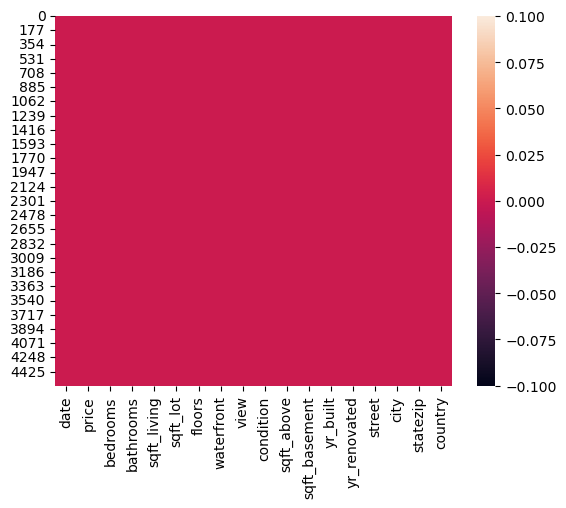

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
# Check duplicate data
duplicate_data=df.duplicated().any()
print(duplicate_data)

False


In [13]:
#Drop to duplicate data 
df=df.drop_duplicates()

In [14]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [15]:
df.isna().mean()*100

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

In [16]:
# To find the number of unique values
df["date"].nunique()

70

In [17]:
df["price"].nunique()

1741

In [18]:
df["bedrooms"].nunique()

10

In [19]:
df["bathrooms"].nunique()

26

In [20]:
df["sqft_living"].nunique()

566

In [21]:
df["sqft_lot"].nunique()

3113

In [22]:
df["floors"].nunique()

6

In [23]:
df["waterfront"].nunique()

2

In [24]:
df["view"].nunique()

5

In [25]:
df["condition"].nunique()

5

In [26]:
df["sqft_above"].nunique()

511

In [27]:
df["sqft_basement"].nunique()

207

In [28]:
df["yr_built"].nunique()

115

In [29]:
df["yr_renovated"].nunique()

60

In [30]:
df["street"].nunique()

4525

In [31]:
df["city"].nunique()

44

In [32]:
df["statezip"].nunique()

77

In [33]:
df["country"].nunique()

1

In [34]:
df["price"].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [35]:
df["street"].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

In [36]:
df.drop(["view","condition","yr_renovated","yr_built"],axis=1).groupby("street").agg(np.median).T

street,1 View Ln NE,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10000-10026 S 100th St,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,...,Indian Trail,Nuthatch Trail,SE 170th Pl,SE 21st Ct,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
price,309620.0,625000.0,600000.0,460000.00,575000.00,397000.0,284000.00,265000.0,289950.0,180000.0,...,991250.00,866000.00,427500.0,1325000.0,544000.0,627000.0,754800.0,435000.0,735000.00,693000.0
bedrooms,3.0,3.0,2.0,2.00,3.00,4.0,4.00,3.0,3.0,3.0,...,3.50,4.00,4.0,4.0,3.0,3.0,2.0,3.0,5.00,3.0
bathrooms,2.5,3.0,1.0,2.25,1.75,2.5,1.75,1.0,2.0,1.0,...,3.00,3.25,2.5,4.0,1.5,3.5,2.5,2.5,2.75,2.5
sqft_living,1860.0,1820.0,910.0,1230.00,2680.00,2320.0,1880.00,1620.0,1670.0,1000.0,...,3215.00,3990.00,2460.0,4420.0,1790.0,2710.0,2770.0,1900.0,3390.00,2460.0
sqft_lot,3730.0,1641.0,2002.0,929.00,8625.00,11717.0,8800.00,9450.0,7757.0,18513.0,...,19192.00,9786.00,5091.0,16526.0,8203.0,3475.0,7781.0,7984.0,5211.00,12028.0
floors,2.0,3.0,1.5,2.00,1.00,2.0,1.00,1.5,1.0,1.0,...,1.75,2.00,2.0,2.0,1.5,2.0,2.0,2.0,2.00,2.0
waterfront,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,...,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
sqft_above,1860.0,1540.0,910.0,1020.00,1590.00,2320.0,1130.00,1620.0,1670.0,1000.0,...,2305.00,3990.00,2460.0,4420.0,1790.0,1650.0,2770.0,1900.0,3390.00,2460.0
sqft_basement,0.0,280.0,0.0,210.00,1090.00,0.0,750.00,0.0,0.0,0.0,...,910.00,0.00,0.0,0.0,0.0,1060.0,0.0,0.0,0.00,0.0


### Data visualisation

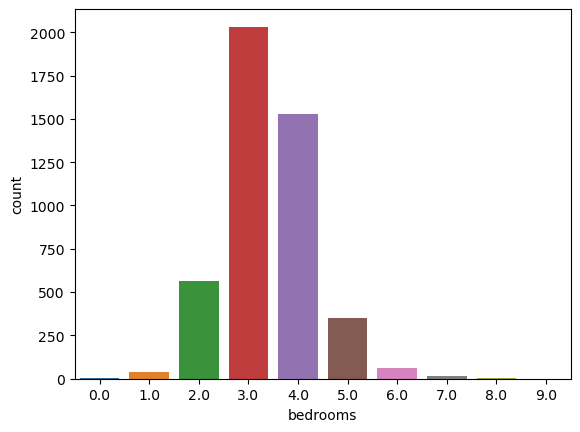

In [37]:
sns.countplot(x="bedrooms",data=df)
plt.show()

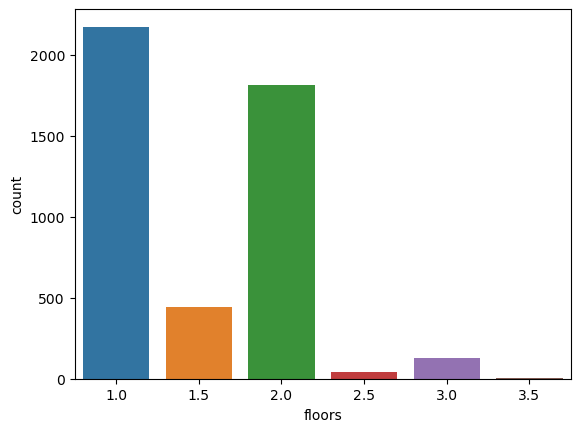

In [38]:
sns.countplot(x="floors",data=df)
plt.show()

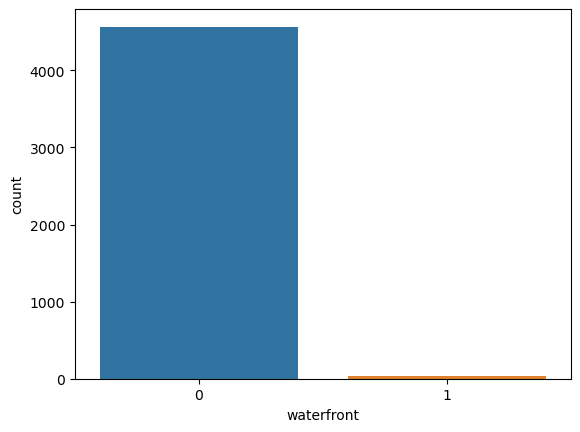

In [39]:
sns.countplot(x="waterfront",data=df)
plt.show()

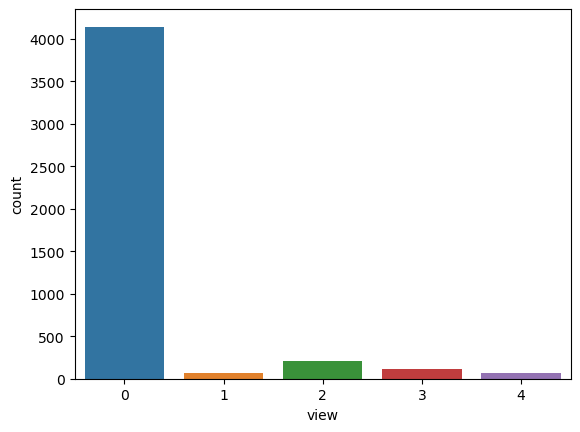

In [40]:
sns.countplot(x="view",data=df)
plt.show()

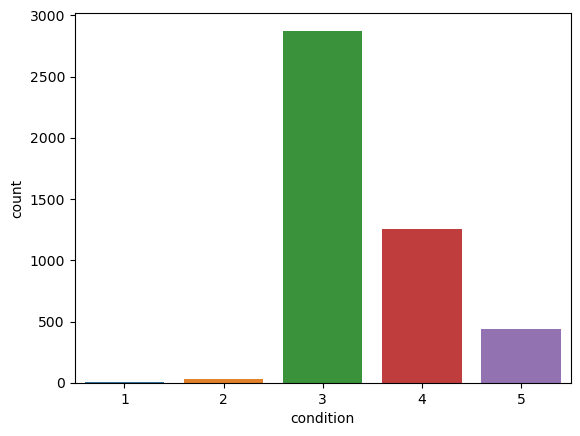

In [41]:
sns.countplot(x="condition",data=df)
plt.show()

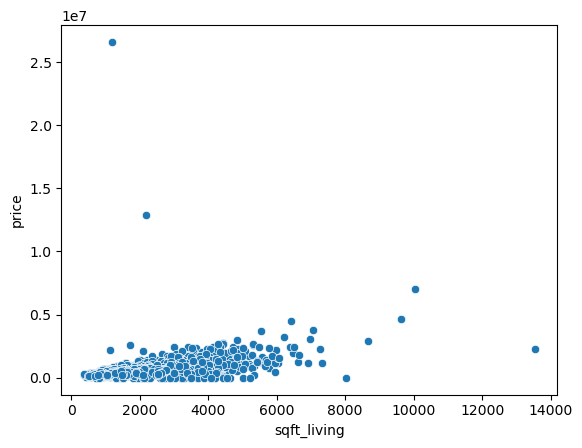

In [42]:
sns.scatterplot(y='price',x='sqft_living',data=df)
plt.show()

C:\Users\d\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

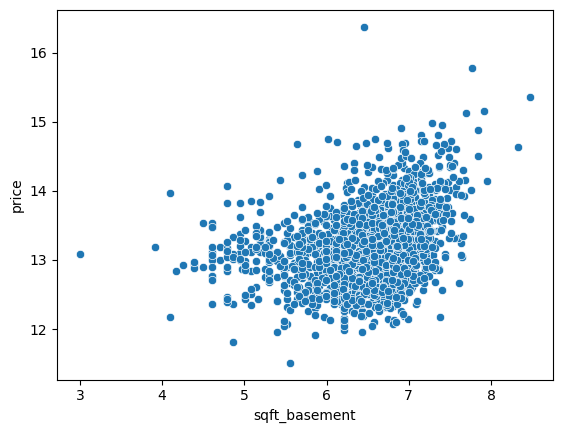

In [43]:
sns.scatterplot(x=np.log(df["sqft_basement"]),y=np.log(df["price"]))
plt.show

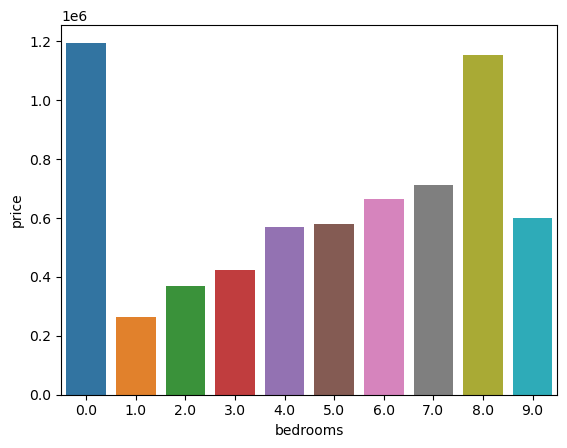

In [44]:
temp=pd.pivot_table(data=df,values=["price"],index="bedrooms",aggfunc="median")
sns.barplot(x=temp.index,y=temp.price)
plt.show()

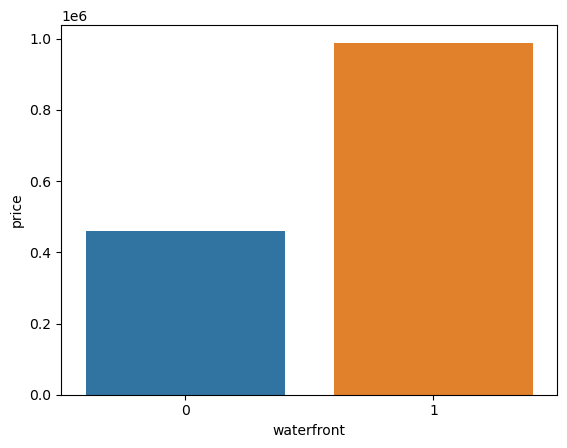

In [45]:
temp=pd.pivot_table(data=df,values=["price"],index="waterfront",aggfunc="median")
sns.barplot(x=temp.index,y=temp.price)
plt.show()

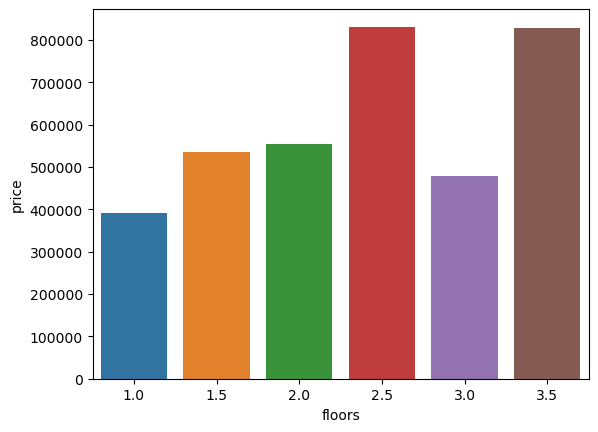

In [46]:
temp=pd.pivot_table(data=df,values=["price"],index="floors",aggfunc="median")
sns.barplot(x=temp.index,y=temp.price)
plt.show()

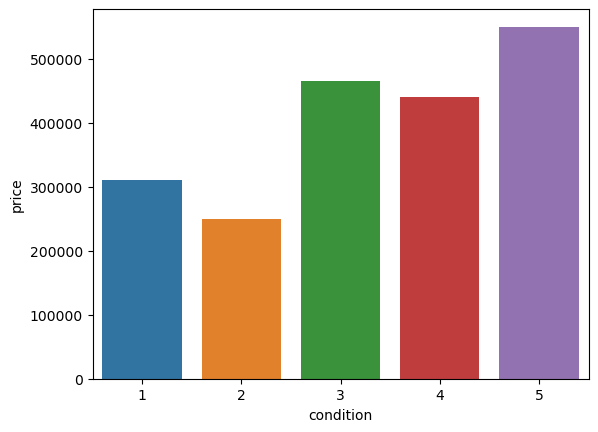

In [47]:
temp=pd.pivot_table(data=df,values=["price"],index="condition",aggfunc="median")
sns.barplot(x=temp.index,y=temp.price)
plt.show()

### Train Test split

In [48]:
X=df[['bedrooms','view','sqft_living','floors']]
y=df['price']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

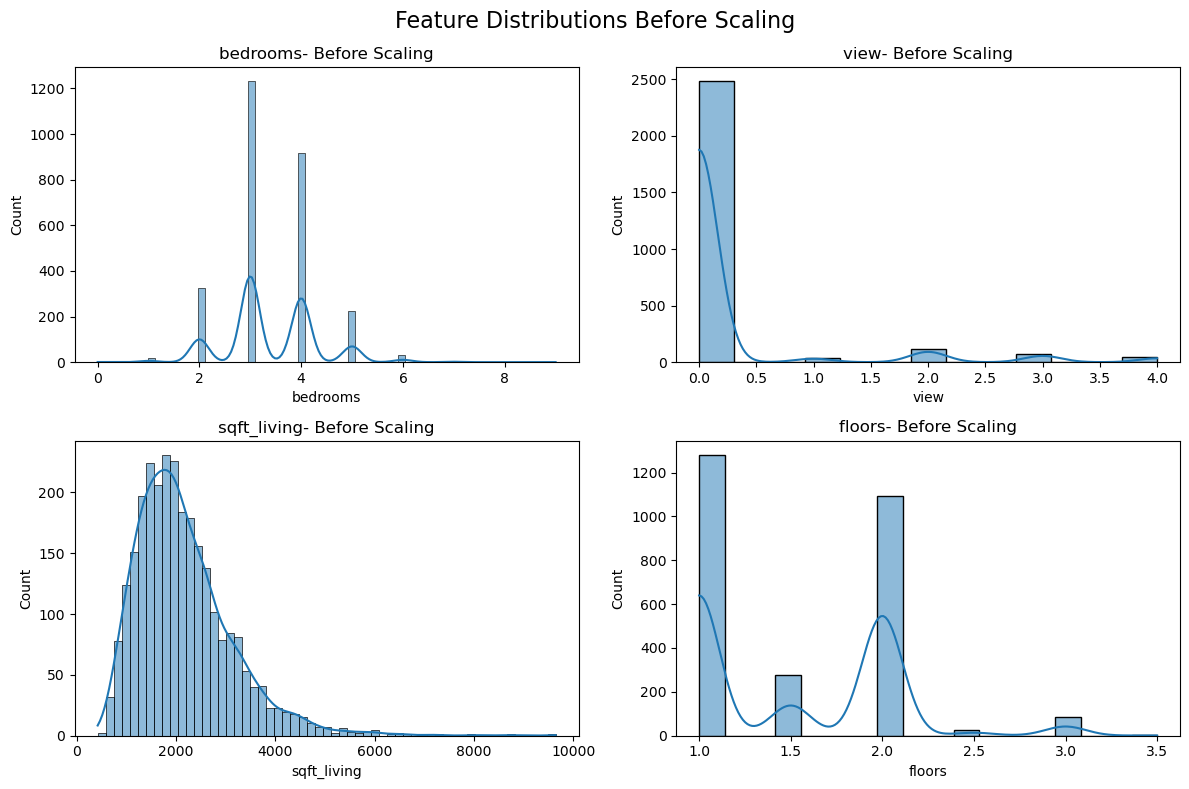

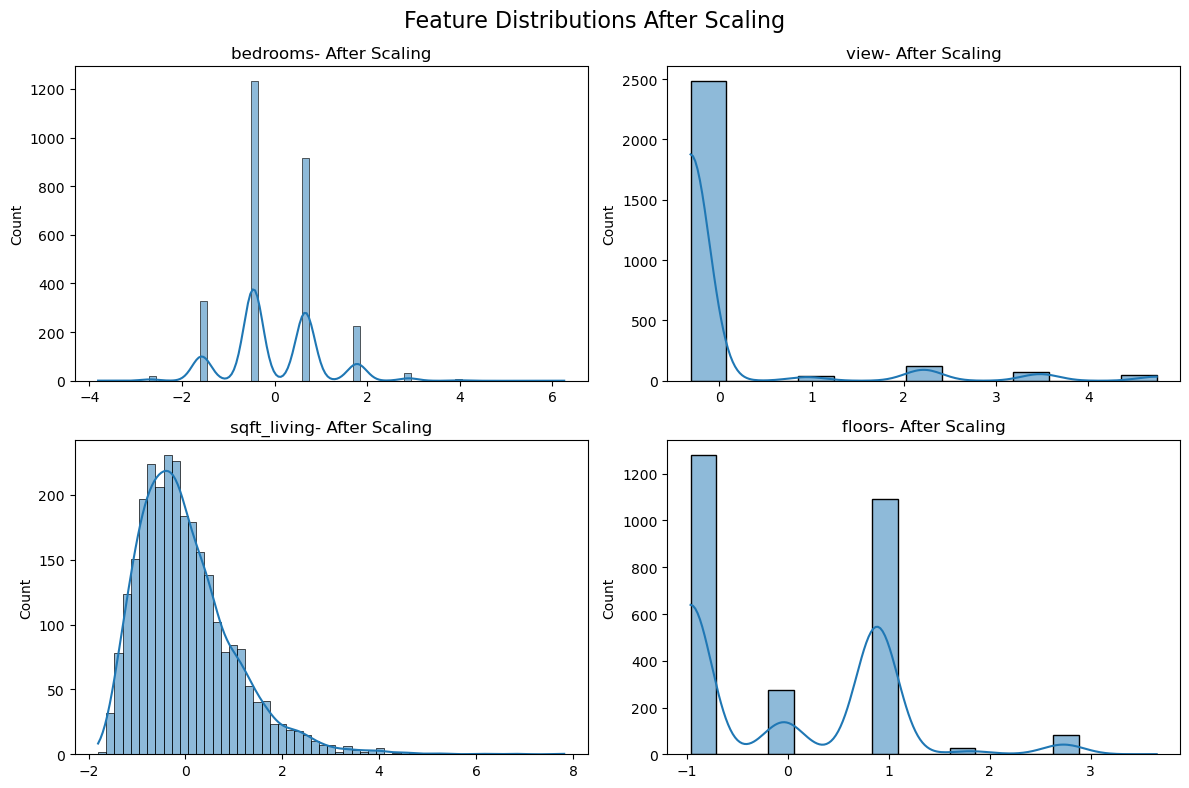

In [50]:
#scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler= StandardScaler()

#fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Create subplots for feature distributions before and after scaling
fig,axes=plt.subplots(2,2,figsize=(12,8))
axes=axes.flatten()

for i,col in enumerate(X.columns):
    sns.histplot(X_train[col],ax=axes[i],kde=True)
    axes[i].set_title(f'{col}- Before Scaling')

fig.suptitle('Feature Distributions Before Scaling',fontsize=16)
plt.tight_layout()
plt.show()

fig,axes=plt.subplots(2,2,figsize=(12,8))
axes=axes.flatten()

for i,col in enumerate(X.columns):
    sns.histplot(X_train_scaled[:,i],ax=axes[i],kde=True)
    axes[i].set_title(f'{col}- After Scaling')
    
fig.suptitle('Feature Distributions After Scaling',fontsize=16)
plt.tight_layout()
plt.show()    
      
    

### Model Building

### Linear Regression

In [51]:
X_train.isnull().sum()

bedrooms       0
view           0
sqft_living    0
floors         0
dtype: int64

In [52]:
X_train.fillna(X_train.mean(),inplace= True)

In [53]:
X_test.fillna(X_test.mean(),inplace=True)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model=LinearRegression()

In [56]:
model.fit(X_train,y_train)

LinearRegression()

In [57]:
print(model.intercept_)

75883.96758262481


In [58]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-39431.935325
view,72923.202398
sqft_living,259.091414
floors,23140.053049


### Predictions from model

In [59]:
predictions=model.predict(X_test)

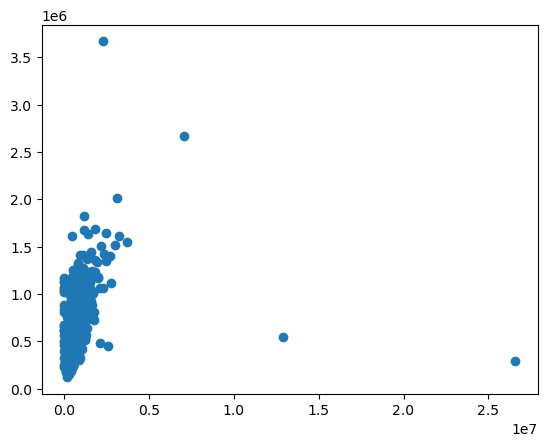

In [60]:
plt.scatter(y_test,predictions)
plt.show()

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the randomforestRegressor model
model=RandomForestRegressor(n_estimators=100,random_state=42)

#Train the model
model.fit(X_train,y_train)

# Make prediction on test data
y_pred=model.predict(X_test)

# evaluation the model
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error:",mse)

Mean squared error: 554176739904.1295


In [62]:
Y_pred=model.predict(X_test)
print("Accuracy Score For Test Data is ",model.score(X_test,y_test)*100,"%")
print("Accuracy Score For Train Data is ",model.score(X_train,y_train)*100,"%")

Accuracy Score For Test Data is  6.227111985063527 %
Accuracy Score For Train Data is  84.45074794997247 %


In [63]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 190415.31390189155
MSE: 533405180028.7209
RMSE: 730345.9317533856


### Test the model

In [64]:
# we can create a dataframe to display the actual and predicted prices side by side
results=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
# Round the prices to two decimal places
results=results.round(2)
print(results)

      Actual Price  Predicted Price
4032     1360000.0       1360888.00
1558      332000.0        707310.70
2004      343000.0        351330.97
3186      660000.0        776474.57
4176      310000.0        364469.05
...            ...              ...
1105      220000.0        550643.58
3797      535000.0        489730.56
166       425000.0        330435.60
154       609000.0        505341.79
1196      622500.0       1325582.84

[1840 rows x 2 columns]


In [65]:
warnings.filterwarnings("ignore",category=UserWarning)
def predict_house_price():
    print("Enter the required house details:")
    sqft_living=float(input("Area of the house:"))
    bedrooms=float(input("No.of bedrooms"))
    view=int(input("view of the house:"))
    floors=float(input("No.of floors"))
    
    
    # scale the user inputs using the fitted scaler
    features=np.array([[sqft_living,bedrooms,view,floors]])
    features_scaled=scaler.transform(features)
    price=model.predict(features_scaled)
    rounded_price=int(round(price[0]))
    
    return rounded_price
# make the price prediction based on input
predicted_price=predict_house_price()
print("Predicted Price:",predicted_price)

Enter the required house details:
Area of the house:1500
No.of bedrooms4
view of the house:4
No.of floors5
Predicted Price: 345316
